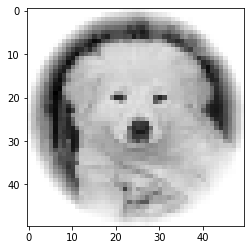

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random
Data_Dir = '/content/drive/MyDrive/MyShares/CatsandDogs/training_set'
Categories = ['dogs' , 'cats']

for category in Categories:
  path = os.path.join(Data_Dir , category)
  for image in os.listdir(path):
    image_array = cv2.imread(os.path.join(path , image) , cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(image_array , (image_size , image_size))
    plt.imshow(new_array , cmap = 'gray')
    plt.show()
    break
  break



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
print(image_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


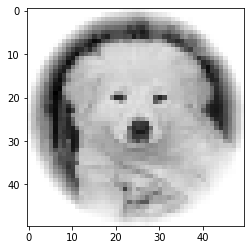

In [19]:
image_size = 50

new_array = cv2.resize(image_array , (image_size , image_size))
plt.imshow(new_array , cmap = 'gray')
plt.show()

In [20]:
training_data = []

def creat_training_data():
  for category in Categories:
    path = os.path.join(Data_Dir , category)
    class_num = Categories.index(category)
    for image in os.listdir(path):
      image_array = cv2.imread(os.path.join(path , image) , cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(image_array , (image_size , image_size))
      training_data.append([new_array , class_num])

creat_training_data()

In [21]:
print(len(training_data))

8000


In [22]:
random.shuffle(training_data)

In [39]:
features = []
labels = []

In [40]:
for feature , label in training_data:
  features.append(feature)
  labels.append(label)

features = np.array(features).reshape(-1 , image_size , image_size , 1)
labels = np.array(labels)

In [41]:
features[1].shape

(50, 50, 1)

In [42]:
features.shape

(8000, 50, 50, 1)

In [43]:
features = features/255.

In [54]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential


class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self , epochs , logs={}):
    if (logs.get('accuracy')> 0.95):
      print('desired accuracy reached, the training stopped')
      model.stop_training = True

callback = mycallback()



model = Sequential([
                tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , input_shape = features.shape[1:]),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(32 , activation = 'relu'),
                tf.keras.layers.Dense(1 , activation = 'sigmoid')

])

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'] )

In [55]:
history = model.fit(features , labels , epochs = 15 , batch_size=32 , validation_split=0.2 , callbacks=[callback])

Epoch 1/15
200/200 [==============================] - 25s 124ms/step - loss: 0.6947 - accuracy: 0.5064 - val_loss: 0.6806 - val_accuracy: 0.5694
Epoch 2/15
200/200 [==============================] - 25s 123ms/step - loss: 0.6552 - accuracy: 0.6176 - val_loss: 0.6461 - val_accuracy: 0.6288
Epoch 3/15
200/200 [==============================] - 25s 123ms/step - loss: 0.6105 - accuracy: 0.6617 - val_loss: 0.6308 - val_accuracy: 0.6494
Epoch 4/15
200/200 [==============================] - 25s 124ms/step - loss: 0.5479 - accuracy: 0.7329 - val_loss: 0.6012 - val_accuracy: 0.6906
Epoch 5/15
200/200 [==============================] - 25s 124ms/step - loss: 0.5033 - accuracy: 0.7495 - val_loss: 0.5927 - val_accuracy: 0.6919
Epoch 6/15
200/200 [==============================] - 25s 123ms/step - loss: 0.4792 - accuracy: 0.7706 - val_loss: 0.5970 - val_accuracy: 0.7044
Epoch 7/15
200/200 [==============================] - 25s 124ms/step - loss: 0.4543 - accuracy: 0.7859 - val_loss: 0.6299 - val_ac

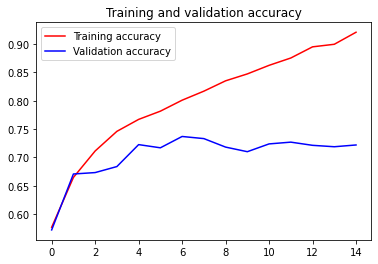

<Figure size 432x288 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [79]:
def prepare_image(filepath):
  img_array = cv2.imread(filepath , cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(image_array , (image_size, image_size))
  return  new_array.reshape(-1 , image_size , image_size , 1)

img_1 = '/content/drive/MyDrive/MyShares/CatsandDogs/105992231-1561667465295gettyimages-521697453.jpeg'
img_2 = '/content/drive/MyDrive/MyShares/CatsandDogs/download.jpg'

image1= prepare_image(img_1)

image2 = prepare_image(img_2)

for image in [image1 , image2]:

  prediction = model.predict(image)
  print(prediction)
  print(Categories[int(prediction[0][0])])



[[0.]]
dogs
[[0.]]
dogs


### ofcourse the accuracy is not that much good it needs more tweaking in parameters as the loss and accuracy of validation must be better 